# Assignment 2 - Feature Manipulation

Class: COMP 5970 - Computer Vision

Author: Chris Hinkson

Email: cmh0201@auburn.edu

*Personal Contribution Statement: This was an individual project and I did everything in it.*

*Generative AI Declaration: ChatGPT was used to explain package syntax and to see examples of how to use package syntax (specifically: cv2, ipywidget, and matplotlib syntax). All code provided here is written by myself with some inspiration from Dr. Aakur's class examples and the examples generated by ChatGPT.*

Assignment Table Of Contents:
1) [Module Import/Config](#module-import--config)
2) [Resource Download](#resource-download)
3) [Task 1 Report](#task-1-report)
4) [Task 2 Report](#task-2-report)

#### Module Import / Config

The below code cell will import any needed modules for assignment 2 and configure them as necessary.

In [1]:
# System
import os
import requests
from tqdm import tqdm
from enum import Enum
from warnings import warn

# Data
import numpy as np

# Image Processing
import cv2

# Display
from IPython.display import display, clear_output
from ipywidgets import interact, FloatSlider, SelectionSlider, Button
import matplotlib.pyplot as plt

#### Resource Download

The below code cell will download any needed resources (images) for assignment 2.

In [2]:

# Create image directory if it does not exist
os.makedirs("../images", exist_ok=True)

# Define image names for this project
imageNames = ["auburn.jpeg", "Part1_scene.png", "puzzle_reference.png", "puzzle_scrambled.png"]
for imageName in tqdm(iterable=imageNames, desc="Downloading Images", unit="image"):
	if not os.path.exists(f"../images/{imageName}"):
		response = requests.get(f"https://github.com/cmh02/COMP5970---Computer-Vision/blob/main/Assignment%202%20-%20Feature%20Manipulation/images/{imageName}?raw=true")
		with open(f"../images/{imageName}", "wb") as imageFile:
			imageFile.write(response.content)
		print(f"-> Saved {imageName} to ../images/{imageName}!")
	else:
		print(f"-> File {imageName} already exists!")



-> File auburn.jpeg already exists!
-> File Part1_scene.png already exists!
-> File puzzle_reference.png already exists!
-> File puzzle_scrambled.png already exists!


## Task 1 Report: 

Description

Task 1 Report Table of Contents:
1. [Approach Strategy](#task-1-approach-strategy)
2. [Implementation Details](#task-1-implementation)
3. [Dependencies and Runtime Instructions](#task-1-dependencies-and-runtime-instructions)
4. [Results](#task-1-results)

### Task 1 Approach Strategy

My approach strategy for Task 1 was to 

### Task 1 Implementation

The first step of my implementation was to 

### Task 1 Dependencies and Runtime Instructions

For Task 1, there are several dependencies required for the program:
1) 

Two files are needed to successfully run the below code cells. These files are automatically downloaded from my github to ensure that they are available:
1) 

To run the program, you 

### Task 1 Results




#### Image Loading and Preparation

This code cell will load the two images and prepare them for the rest of the task.

In [3]:
# Load
image_auburn = cv2.imread("../images/auburn.jpeg")
image_scene = cv2.imread("../images/Part1_scene.png")

# Convert the images to grayscale
imageGray_auburn = cv2.cvtColor(src=image_auburn, code=cv2.COLOR_BGR2GRAY)
imageGray_scene = cv2.cvtColor(src=image_scene, code=cv2.COLOR_BGR2GRAY)

# Convert the images to RGB
imageRGB_auburn = cv2.cvtColor(src=image_auburn, code=cv2.COLOR_BGR2RGB)
imageRGB_scene = cv2.cvtColor(src=image_scene, code=cv2.COLOR_BGR2RGB)

# Get image dimensions
imageHeight_auburn, imageWidth_auburn, imageDepth_auburn = image_auburn.shape
imageHeight_scene, imageWidth_scene, imageDepth_scene = image_scene.shape

#### Sift Keypoint Detection

This code cell will use SIFT (via cv2) for keypoint detection.

References:
1. Dr. Aaukur's Class Demo Notebook
2. [CV2 Sift Tutorial](https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html)

(np.float64(-0.5), np.float64(793.5), np.float64(535.5), np.float64(-0.5))

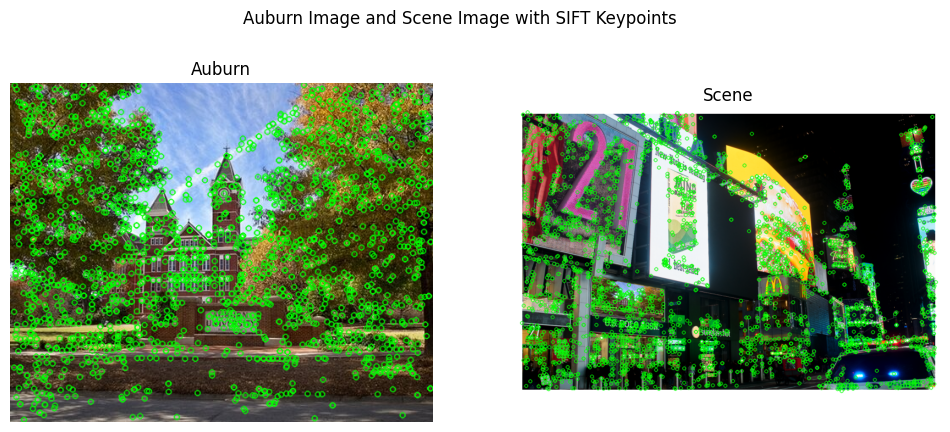

In [4]:
# Create sift for keypoint detection and descriptor extraction
sift = cv2.SIFT_create()
keypoints_auburn, descriptors_auburn = sift.detectAndCompute(imageGray_auburn, None)
keypoints_scene, descriptors_scene = sift.detectAndCompute(imageGray_scene, None)

# Draw keypoints on the images for display
image_withKeypoints_auburn = cv2.drawKeypoints(image=image_auburn, keypoints=keypoints_auburn, outImage=None, color=(0, 255, 0))
image_withKeypoints_scene = cv2.drawKeypoints(image=image_scene, keypoints=keypoints_scene, outImage=None, color=(0, 255, 0))
imageGray_withKeypoints_auburn = cv2.drawKeypoints(image=imageGray_auburn, keypoints=keypoints_auburn, outImage=None, color=(0, 255, 0))
imageGray_withKeypoints_scene = cv2.drawKeypoints(image=imageGray_scene, keypoints=keypoints_scene, outImage=None, color=(0, 255, 0))
imageRGB_withKeypoints_auburn = cv2.drawKeypoints(image=imageRGB_auburn, keypoints=keypoints_auburn, outImage=None, color=(0, 255, 0))
imageRGB_withKeypoints_scene = cv2.drawKeypoints(image=imageRGB_scene, keypoints=keypoints_scene, outImage=None, color=(0, 255, 0))

# Create plot and display the RGB images with keypoints
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Auburn Image and Scene Image with SIFT Keypoints")
ax1.imshow(imageRGB_withKeypoints_auburn)
ax2.imshow(imageRGB_withKeypoints_scene)
ax1.set_title("Auburn")
ax2.set_title("Scene")
ax1.axis("off")
ax2.axis("off")



#### FLANN Keypoint Matching

This code cell will use FLANN to match the keypoints.

References:
1. Dr. Aaukur's Class Demo Notebook
2. [CV2 FLANN Tutorial](https://docs.opencv.org/3.4/d5/d6f/tutorial_feature_flann_matcher.html)

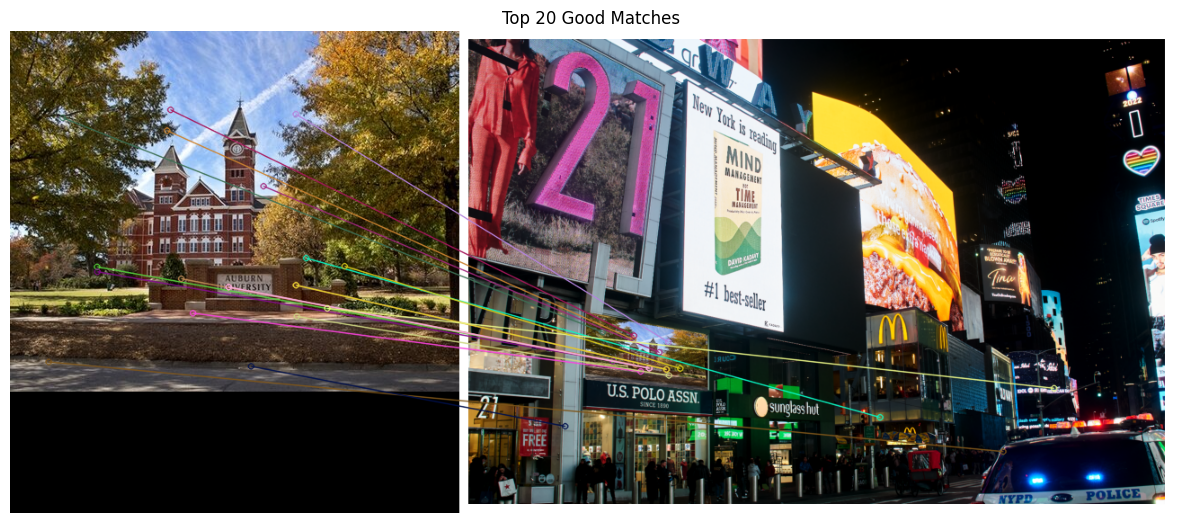

In [5]:
# Get index and search parameters
FLANN_INDEX_KDTREE = 1
indexParameters = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
searchParameters = dict(checks=50)

# Create FLANN matcher and get matches for auburn and scene images
flannMatcher = cv2.FlannBasedMatcher(indexParameters, searchParameters) # type: ignore
matches = flannMatcher.knnMatch(descriptors_auburn, descriptors_scene, k=2)

# Peform Lowe's ratio test to find good matches at the threshold
loweRatioThreshold = 0.75
goodMatchesFound = []
for bestMatch, secondBestMatch in matches:
    
    # If the best match is better than second best then its a good match
    if bestMatch.distance < loweRatioThreshold * secondBestMatch.distance:
        goodMatchesFound.append(bestMatch)

# Draw matches and display
img_matches = cv2.drawMatches(
	img1=imageRGB_auburn, 
	keypoints1=keypoints_auburn, 
	img2=imageRGB_scene, 
	keypoints2=keypoints_scene, 
	matches1to2=goodMatchesFound[:20], 
	outImg=None, 
	flags=2
    )
plt.figure(figsize=(15, 10))
plt.title("Top 20 Good Matches")
plt.imshow(img_matches)
plt.axis('off')
plt.show()

#### Homography Estimation with RANSCAC

This code cell will estimate hopography with RANSAC to find the matrix for mapping the perspective transformation.

References:
1. Dr. Aaukur's Class Demo Notebook
2. [CV2 Homography Tutorial](https://docs.opencv.org/3.4/d1/de0/tutorial_py_feature_homography.html)

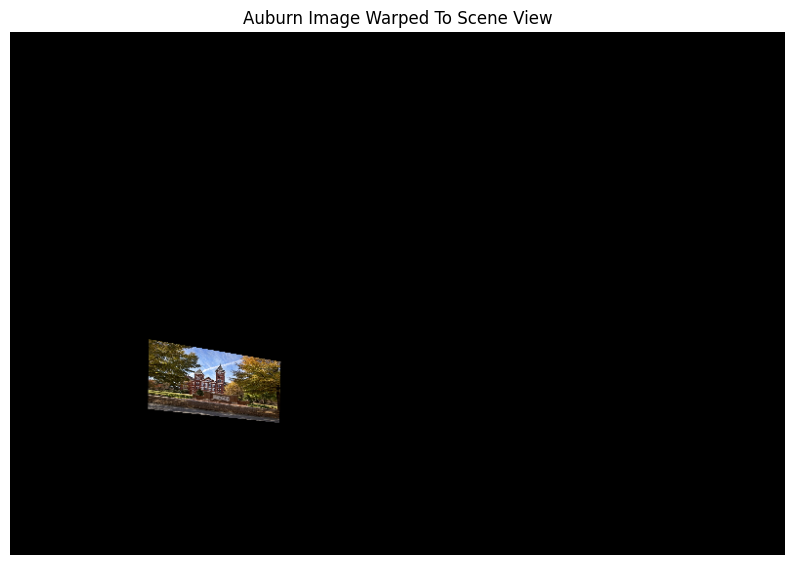

In [6]:
# Make sure we have enough matches
if len(goodMatchesFound) <= 10:
    raise Exception("Not enough good matches were produced to estimate homography!")

# Get locations in the auburn image and scene image
imagePoints_auburn = np.float32([keypoints_auburn[match.queryIdx].pt for match in goodMatchesFound]).reshape(-1, 1, 2) # type: ignore
imagePoints_scene = np.float32([keypoints_scene[match.trainIdx].pt for match in goodMatchesFound]).reshape(-1, 1, 2) # type: ignore

# Estimate homography using RANSAC
homographyMatrix, mask = cv2.findHomography(srcPoints=imagePoints_auburn, dstPoints=imagePoints_scene, method=cv2.RANSAC, ransacReprojThreshold=5.0)
image_warped_auburn = cv2.warpPerspective(imageRGB_auburn, homographyMatrix, (imageWidth_scene, imageHeight_scene))

# Show the warped image
plt.figure(figsize=(10, 10))
plt.title("Auburn Image Warped To Scene View")
plt.imshow(image_warped_auburn)
plt.axis('off')
plt.show()

#### Perspective Transformation With Bounding Box

This code cell will do the perspective transformation to put a bounding box in the scene around the auburn image.

References:
1. Dr. Aaukur's Class Demo Notebook

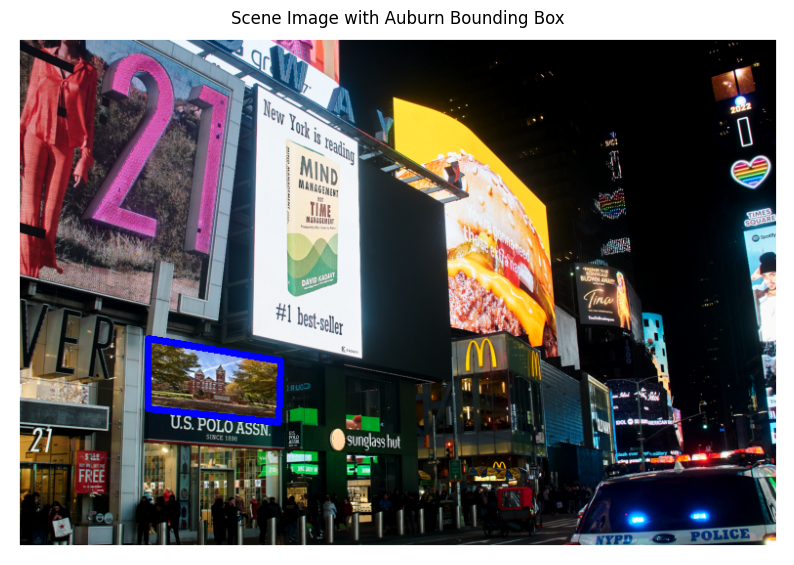

In [7]:
# Get the corners from the auburn image
imageCorners_normal_auburn = np.float32([[0, 0], [imageWidth_auburn, 0], [imageWidth_auburn, imageHeight_auburn], [0, imageHeight_auburn]]) # type: ignore

# Transform the corners to the scene using the homography
imageCorners_transformed_auburn = cv2.perspectiveTransform(src=imageCorners_normal_auburn.reshape(-1, 1, 2), m=homographyMatrix, dst=None) # type: ignore

# Draw the bounding box on the scene image
image_withBoundingBox_scene = cv2.polylines(img=imageRGB_scene.copy(), pts=[np.int32(imageCorners_transformed_auburn)], isClosed=True, color=(0, 0, 255), thickness=5) # type: ignore

# Show the scene image with bounding box
plt.figure(figsize=(10, 10))
plt.title("Scene Image with Auburn Bounding Box")
plt.imshow(image_withBoundingBox_scene)
plt.axis('off')
plt.show()

## Task 2 Report: 

Description

Task 2 Report Table of Contents:
1. [Approach Strategy](#task-2-approach-strategy)
2. [Implementation Details](#task-2-implementation)
3. [Dependencies and Runtime Instructions](#task-2-dependencies-and-runtime-instructions)
4. [Results](#task-2-results)

### Task 2 Approach Strategy

My approach strategy for Task 2 was to 

### Task 2 Implementation

The first step of my implementation was to 

### Task 2 Dependencies and Runtime Instructions

For Task 2, there are several dependencies required for the program:
1) 

Two files are needed to successfully run the below code cells. These files are automatically downloaded from my github to ensure that they are available:
1) 

To run the program, you 

### Task 2 Results


challenges and solutions:
- not enough matches -> increased lowe ratio
- low inliers -> increases ransac threshold
- still not getting enough good matches -> dynamically increase lowe's ratio until either enough matches are found or it gets too high


#### Image Loading and Preparation

This code cell will load the puzzle images and prepare them for task 2.

In [8]:
# Load puzzle images
image_puzzle_reference = cv2.imread("../images/puzzle_reference.png")
image_puzzle_scrambled = cv2.imread("../images/puzzle_scrambled.png")

# Convert the images to greyscale
imageGray_puzzle_reference = cv2.cvtColor(src=image_puzzle_reference, code=cv2.COLOR_BGR2GRAY)
imageGray_puzzle_scrambled = cv2.cvtColor(src=image_puzzle_scrambled, code=cv2.COLOR_BGR2GRAY)

# Convert the images to RGB
imageRGB_puzzle_reference = cv2.cvtColor(src=image_puzzle_reference, code=cv2.COLOR_BGR2RGB)
imageRGB_puzzle_scrambled = cv2.cvtColor(src=image_puzzle_scrambled, code=cv2.COLOR_BGR2RGB)

# Get image dimensions
imageHeight_puzzle_reference, imageWidth_puzzle_reference, imageDepth_puzzle_reference = image_puzzle_reference.shape
imageHeight_puzzle_scrambled, imageWidth_puzzle_scrambled, imageDepth_puzzle_scrambled = image_puzzle_scrambled.shape

# Get tile dimensions because the puzzles are apparently different sizes
tilesize_puzzle_scrambled = imageWidth_puzzle_scrambled // 4
tilesize_puzzle_reference = imageWidth_puzzle_reference // 4

#### Image Tilizer Class

This code cell will make an Image Tilizer class (based on my ImageTransformer from Assignment 1) to provide an easy way to get tiles from an image.

In [9]:

from matplotlib.pylab import tile


class ImageTilizer:

	# Class Constructor
	def __init__(self, image: cv2.typing.MatLike, tileSize: int=64):
		
		# Instance variables
		self.image = image
		self.tileSize = tileSize
		self.currentTile = (0, 0)

		# Calculate number of tiles in each dimension
		self.numberTiles = (self.image.shape[0]//self.tileSize, self.image.shape[1]//self.tileSize)

		# Print instance configuration
		print(f"A new image tilizer has been created!")
		print(f"-> Tile Size: {self.tileSize}")
		print(f"-> Number of Tiles: {self.numberTiles}")

	# Get specific tile
	def getTile(self, tileRow: int, tileCol: int, inFullImageSize: bool=False) -> cv2.typing.MatLike:

		# Ensure image has been set
		if self.image is None:
			raise ValueError("No image has been loaded yet!")
		
		# Ensure that the tile indices are valid
		if (tileRow < 0 or tileRow >= self.numberTiles[0] or tileCol < 0 or tileCol >= self.numberTiles[1]):
			raise ValueError(f"Tile indices ({tileRow}, {tileCol}) are out of bounds for number of tiles {self.numberTiles}!")

		# Calculate the beginning and ending pixel indices for specified tile
		rowStart = tileRow * self.tileSize
		rowEnd = rowStart + self.tileSize
		colStart = tileCol * self.tileSize
		colEnd = colStart + self.tileSize

		# Return the tile as just the pixels in the specified bounds
		tile =  self.image[rowStart:rowEnd, colStart:colEnd].copy()

		# If wanted then return tile as part of full image with everything else black otherwise return just the tile
		if inFullImageSize:
			newImage = np.zeros_like(self.image)
			newImage[rowStart:rowEnd, colStart:colEnd] = tile
			return newImage
		return tile

	# Iterate over tiles
	def iterTiles(self):
		
		# Yield the tiles one by one
		for imageTileRow in range(self.numberTiles[0]):
			for imageTileColumn in range(self.numberTiles[1]):
				self.currentTile = (imageTileRow, imageTileColumn)
				yield self.getTile(imageTileRow, imageTileColumn)

#### Tile Sifting

This code cell will use SIFT to warp each tile to the correct location based on the reference image.

A new image tilizer has been created!
-> Tile Size: 64
-> Number of Tiles: (4, 4)
A new image tilizer has been created!
-> Tile Size: 64
-> Number of Tiles: (4, 4)


Reconstructing Puzzle: 6tile [00:00, 54.47tile/s]

Not enough good matches were produced to estimate homography for tile (0, 0)!
Not enough good matches were produced to estimate homography for tile (0, 1)!
Not enough good matches were produced to estimate homography for tile (0, 2)!
Not enough good matches were produced to estimate homography for tile (0, 3)!
Not enough good matches were produced to estimate homography for tile (1, 0)!
Not enough good matches were produced to estimate homography for tile (1, 1)!
Tile (1, 2) has 7 good matches.
Not enough good matches were produced to estimate homography for tile (1, 3)!
Tile (2, 0) has 35 good matches.


Reconstructing Puzzle: 16tile [00:00, 39.83tile/s]

Tile (2, 1) has 8 good matches.
Not enough good matches were produced to estimate homography for tile (2, 2)!
Not enough good matches were produced to estimate homography for tile (2, 3)!
Not enough good matches were produced to estimate homography for tile (3, 0)!
Tile (3, 1) has 9 good matches.
Tile (3, 2) has 12 good matches.
Not enough good matches were produced to estimate homography for tile (3, 3)!


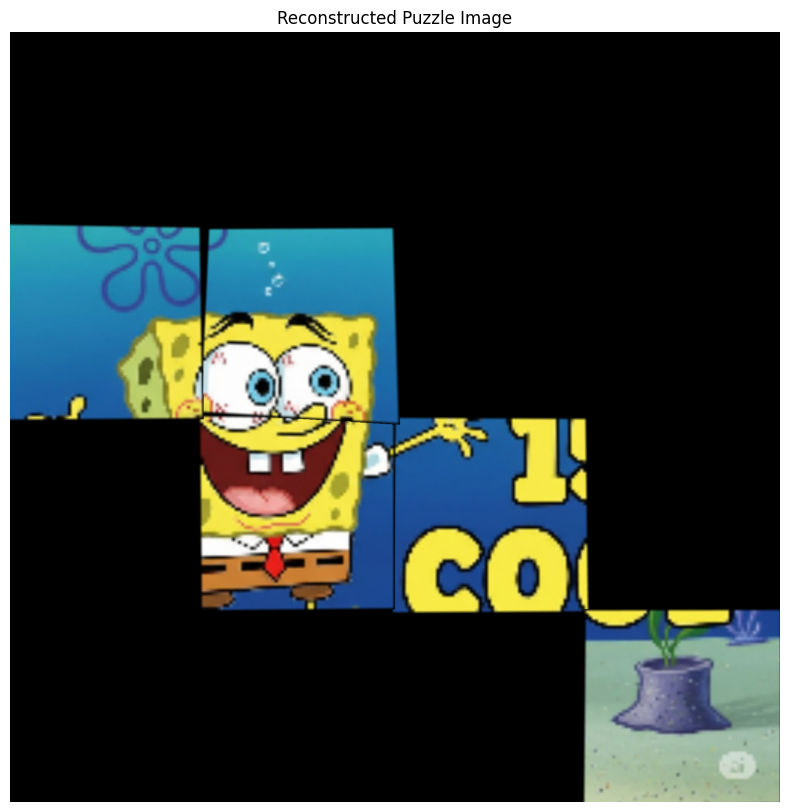

In [ ]:
# Make a blank image to hold the solved puzzle
image_puzzle_reconstructed = np.zeros_like(image_puzzle_reference)

# Create an instance of the ImageTilizer class to get tiles in grayscale and rgb
Task2ImageTilizer_Gray = ImageTilizer(image=imageGray_puzzle_scrambled, tileSize=64)
Task2ImageTilizer_RGB = ImageTilizer(image=imageRGB_puzzle_scrambled, tileSize=64)

# Get the keypoints and descriptors for the reference image
sift = cv2.SIFT_create()
keypoints_reference, descriptors_reference = sift.detectAndCompute(imageGray_puzzle_reference, None)

# Setup FLANN
FLANN_INDEX_KDTREE = 1
indexParameters = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
searchParameters = dict(checks=100)
flannMatcher = cv2.FlannBasedMatcher(indexParameters, searchParameters) # type: ignore

# Setup Lowe's ratio test and RANSAC parameters
loweRatioThreshold = 0.75
ransacReprojThreshold = 20.0

# Utility function for lowe's test, returns only good matches based on threshold
def applyLoweRatioTest(matches, loweRatioThreshold):
	return [bestMatch for bestMatch,secondBestMatch in matches if (bestMatch.distance < loweRatioThreshold * secondBestMatch.distance)]

# Iterate over tiles to calculate their best matched location and store in the reconstructed image
for tile in tqdm(iterable=Task2ImageTilizer_Gray.iterTiles(), desc="Reconstructing Puzzle", unit="tile"):

	# Get the keypoints and descriptors for the current tile
	keypoints_tile, descriptors_tile = sift.detectAndCompute(tile, None)

	# Use FLANN to find matches between the tile and the reference image
	matches = flannMatcher.knnMatch(descriptors_tile, descriptors_reference, k=2)

	# Peform Lowe's ratio test to find good matches, increasing threshold until we get enough matches for the tile
	goodMatchesFound = applyLoweRatioTest(matches, loweRatioThreshold)
	if len(goodMatchesFound) <= 5:
		goodMatchesFound = applyLoweRatioTest(matches, loweRatioThreshold + 0.05)
	if len(goodMatchesFound) <= 5:
		goodMatchesFound = applyLoweRatioTest(matches, loweRatioThreshold + 0.10)
	if len(goodMatchesFound) <= 5:
		print(f"Not enough good matches were produced to estimate homography for tile {Task2ImageTilizer_Gray.currentTile}!")
		continue
	print(f"Tile {Task2ImageTilizer_Gray.currentTile} has {len(goodMatchesFound)} good matches.")

	# Get locations in the tile and reference image
	imagePoints_tile = np.float32([keypoints_tile[match.queryIdx].pt for match in goodMatchesFound]).reshape(-1, 1, 2) # type: ignore
	imagePoints_reference = np.float32([keypoints_reference[match.trainIdx].pt for match in goodMatchesFound]).reshape(-1, 1, 2) # type: ignore

	# Get the tile as RGB
	tile_RGB = Task2ImageTilizer_RGB.getTile(Task2ImageTilizer_Gray.currentTile[0], Task2ImageTilizer_Gray.currentTile[1])

	# Estimate homography using RANSAC
	homographyMatrix, mask = cv2.findHomography(srcPoints=imagePoints_tile, dstPoints=imagePoints_reference, method=cv2.RANSAC, ransacReprojThreshold=ransacReprojThreshold)
	if homographyMatrix is None:
		# raise Exception(f"Homography could not be computed for tile {Task2ImageTilizer_Gray.currentTile}!")
		print(f"Homography could not be computed for tile {Task2ImageTilizer_Gray.currentTile}!")
		continue

    # Warp the tile and place it in the placeholder image using a mask 
	tile_warped = cv2.warpPerspective(tile_RGB, homographyMatrix, (imageWidth_puzzle_reference, imageHeight_puzzle_reference))
	tile_mask = cv2.cvtColor(tile_warped, cv2.COLOR_BGR2GRAY) > 0 
	image_puzzle_reconstructed[tile_mask] = tile_warped[tile_mask]


# Display the reconstructed image
fig, axs = plt.subplots(figsize=(10, 10))
axs.set_title("Reconstructed Puzzle Image")
axs.imshow(image_puzzle_reconstructed)
axs.axis('off')
plt.show()